# Práctica 1: Regresión lineal

Greta y Héloïse

# Leer el contenido del archivo

In [2]:
import numpy as np
from pandas.io.parsers import read_csv

In [3]:
datos = read_csv("ex1data1.csv", header=None).to_numpy()
print(datos.shape)
print(datos[:10])

(97, 2)
[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]
 [ 8.3829 11.886 ]
 [ 7.4764  4.3483]
 [ 8.5781 12.    ]
 [ 6.4862  6.5987]
 [ 5.0546  3.8166]]


# Método de descenso de gradiente

In [4]:
# Function to calculate the cost of a data set with w,b parameters fixed
def coste(data, w, b):
    m = data.shape[0]
    J = sum( (w*data[i,0]+b - data[i,1])**2 for i in range(0,m))
    J = J / (2*m)
    return J

# Function to calculate the minimal cost function by the Gradient Descent Method for Linear Regression
def gradiente_descenso(data, learning_rate, max_iter):
    alpha = learning_rate
    w = 0
    b = 0
    m = data.shape[0]
    J_wb = coste(data, w, b)
    minJ = J_wb
    iter = 0
    
    while (iter<max_iter) and (minJ>1) :
        dJ_w = sum( (w*data[i,0]+b - data[i,1])*data[i,0] for i in range(0, m))
        dJ_w = dJ_w / m
        dJ_b = sum( (w*data[i,0]+b - data[i,1]) for i in range(0, m))
        dJ_b = dJ_b / m
        tmp_w = w - alpha * dJ_w
        tmp_b = b - alpha * dJ_b
        w = tmp_w
        b = tmp_b
        J_wb = coste(data, w, b)
        minJ = min(minJ, J_wb)
        iter += 1
    return minJ, w, b

# Regrésion lineal para el conjunto de datos

El coste inicial con w = 0 y b = 0 es de aproximadamente 32.07 .
Para una población de 70.000 habitantes (x = 7) predicen unos beneficios aproximados de $45.282, averiguamos: $ 45.342 .


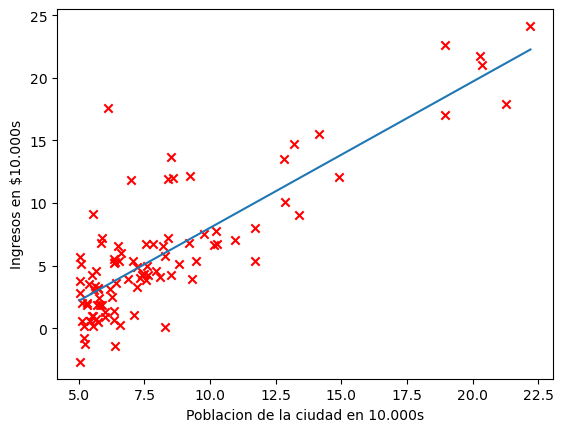

In [5]:
import matplotlib.pyplot as plt

# Plot the data of the file
fig = plt.figure()
ax = fig.add_subplot(111)
x,y = datos[:,0], datos[:,1]
ax.scatter(x, y, c='r', marker='x')
ax.set_xlabel('Poblacion de la ciudad en 10.000s')
ax.set_ylabel('Ingresos en $10.000s')

# Calculate the initial cost for the data set
cost = coste(datos,0,0)
print("El coste inicial con w = 0 y b = 0 es de aproximadamente", "%.2f" % cost, ".")

# Do the Gradient Descent Method for Linear Regression
learning_rate = 0.01
max_iter = 1500
minJ, w_min, b_min = gradiente_descenso(datos, learning_rate, max_iter)

# Verify a point
print('Para una población de 70.000 habitantes (x = 7) predicen unos beneficios aproximados de $45.282, averiguamos: $', "%.3f" % ((w_min*7+b_min)*10), '.') 

# Plot the resulting minimal cost function
x_reg = np.linspace(min(datos[:,0]), max(datos[:,0]))
y_reg = w_min * x_reg + b_min
plt.plot(x_reg,y_reg)
plt.show()